In [120]:
!pip3 install xgboost


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [122]:
data = fetch_california_housing()

In [123]:
X = data.data
y = data.target

In [124]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [125]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [126]:
X.shape, y.shape

((20640, 8), (20640,))

In [127]:
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

In [128]:
k_fold = KFold(n_splits=5, shuffle=True)

In [129]:
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []


<h1>Voting</h1>

![VAE](https://i.imgur.com/pvmtooC.png)

In [130]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    lr = LinearRegression()
    dt = DecisionTreeRegressor()    
    knn_5 = KNeighborsRegressor(n_neighbors=5)
    knn_7 = KNeighborsRegressor(n_neighbors=7)
    knn_9 = KNeighborsRegressor(n_neighbors=9)
    
    models = [('lr', lr),
              ('dt', dt),
              ('knn_5', knn_5),
              ('knn_7', knn_7),
              ('knn_9', knn_9),
             ]
    
    regressor = VotingRegressor(models)
    regressor.fit(train_x, train_y)
    pred_y = regressor.predict(test_x)
    print(r2_score(pred_y, test_y))
    
    for name, model in models:
        model.fit(train_x, train_y)
        pred_y = model.predict(test_x)
        print(name, r2_score(pred_y, test_y))
        
    print()

0.6186202427974776
lr 0.3630409531722938
dt 0.604384321170337
knn_5 0.5916820786327475
knn_7 0.5855343633018024
knn_9 0.5701306930227339

0.5859935565568091
lr 0.3277066704005006
dt 0.5970729460466484
knn_5 0.5466087219906433
knn_7 0.5413576005287192
knn_9 0.5325423642388899

0.5883330368028505
lr 0.3421972446942436
dt 0.5921802908545815
knn_5 0.5466663737433219
knn_7 0.5399985890891645
knn_9 0.5342836487291678

0.6232336747580292
lr 0.35469012817227186
dt 0.610776646696199
knn_5 0.5965596325169336
knn_7 0.5910889217882823
knn_9 0.5826714755107296

0.5991669489813254
lr 0.35660219058785014
dt 0.6243309686634919
knn_5 0.5466454701283514
knn_7 0.5456447074207362
knn_9 0.5356873525470134



<h1>Bagging</h1>

In [131]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    bagging = BaggingRegressor(n_estimators=20)
    bagging.fit(train_x, train_y)
    pred_y = bagging.predict(test_x)
    
    print(r2_score(pred_y, test_y))

0.7462278782686593
0.7392421399480591
0.7323569287290321
0.7527775613902385
0.7614674225383921


<h1>Bagging - Random Forest</h1>

![VAE](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

In [132]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    rf = RandomForestRegressor(n_estimators=70)
    rf.fit(train_x, train_y)
    pred_y = rf.predict(test_x)
    
    print(r2_score(pred_y, test_y))

0.7509466806054537
0.7180945040833805
0.7672500827137623
0.7467780336725358
0.7704877130777916


<h1>Boosting - AdaBoost</h1>

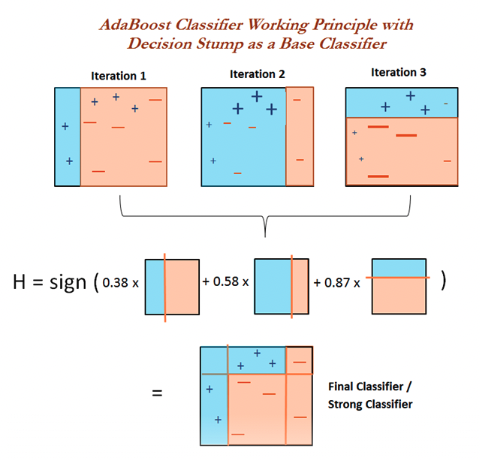

In [133]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    adaBoost = AdaBoostRegressor(n_estimators=100)
    adaBoost.fit(train_x, train_y)
    pred_y = adaBoost.predict(test_x)
    
    print(r2_score(pred_y, test_y))

-1.1804960307406076
-0.9442162511535306
-1.2647196291811387
-0.480692117421577
-1.4202619670023027


<h1>Boosting - GradientBoost</h1>

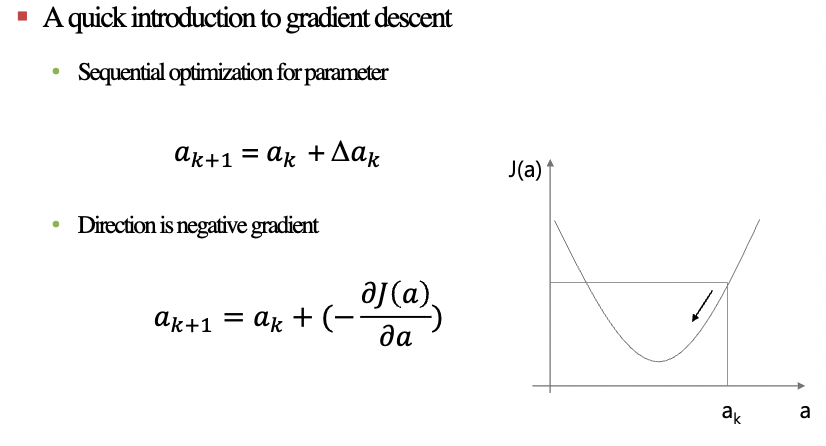

In [134]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    gradientBoost = GradientBoostingRegressor()
    gradientBoost.fit(train_x, train_y)
    pred_y = gradientBoost.predict(test_x)
    
    print(r2_score(pred_y, test_y))

0.7313891328448368
0.7152895203553393
0.723177930603639
0.6916123453227028
0.6910491968164882


<h1>Boosting - XGBoost</h1>

In [135]:
for train_idx, test_idx in k_fold.split(X,y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    xgboost = XGBRegressor()
    xgboost.fit(train_x, train_y)
    pred_y = xgboost.predict(test_x)
    
    print(r2_score(pred_y, test_y))

0.8047535123522218
0.806433463873405
0.8048284732063311
0.8128808461877548
0.8118291854371034


<h1>Assignment</h1>

Sex / nominal / -- / M, F, and I (infant)
<br>Length / continuous / mm / Longest shell measurement
<br>Diameter / continuous / mm / perpendicular to length
<br>Height / continuous / mm / with meat in shell
<br>Whole weight / continuous / grams / whole abalone
<br>Shucked weight / continuous / grams / weight of meat
<br>Viscera weight / continuous / grams / gut weight (after bleeding)
<br>Shell weight / continuous / grams / after being dried
<br>Rings / integer / -- / +1.5 gives the age in years

In [136]:
import pandas as pd

In [137]:
abalone_data = pd.read_csv('C:\\Users\\USER\\Desktop\\2022\\수업\\2학기\\기계학습-김동일 교수님\\abalone.csv')

In [138]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [139]:
abalone_data.Rings.value_counts().sum()     # 전체 갯수

4177

In [140]:
abalone_data['Age'] = abalone_data.Rings + 1.5      # 라벨

In [141]:
abalone_data.Age[abalone_data.Age > 11].value_counts().sum()    # 11 살 기준으로 분류하면 1 : 1 비

2081

In [142]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [143]:
abalone_data.Sex[abalone_data.Sex == 'M'] = 1
abalone_data.Sex[abalone_data.Sex == 'F'] = -1
abalone_data.Sex[abalone_data.Sex == 'I'] = 0

In [144]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [145]:
# 라벨 변환 (분류 이므로)
abalone_data['OlderThan11'] = abalone_data.Age > 11

In [146]:
abalone_data.OlderThan11[abalone_data.OlderThan11 == True] = 1
abalone_data.OlderThan11[abalone_data.OlderThan11 == False] = 0

In [147]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,OlderThan11
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,1.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0.0
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,0.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,1.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1.0
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,1.0
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0.0
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1.0


In [148]:
del abalone_data['Age']
del abalone_data['Rings']

In [149]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,OlderThan11
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


In [150]:
import warnings
warnings.filterwarnings(action='ignore')

In [151]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier


In [152]:
result = []
recall_scores = {}
precision_scores = {}
accuracy_scores = {}
f1_scores = {}
confusion_matrixs = {}
coeff_ = {}

In [153]:
type(abalone_data)

pandas.core.frame.DataFrame

In [154]:
y = abalone_data.iloc[:,-1]
X = abalone_data.iloc[:,:-1]

In [155]:
for i, (train_index, test_index) in enumerate(k_fold.split(abalone_data)):
    train_x, train_y = X.iloc[train_index], y.iloc[train_index]
    test_x, test_y = X.iloc[test_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    model = RandomForestClassifier(n_estimators=50,random_state=0)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    result.append(pred_y)
    recall_scores[f'fold {i}'] = recall_score(pred_y, test_y)
    precision_scores[f'fold {i}'] = precision_score(pred_y, test_y)
    accuracy_scores[f'fold {i}'] = accuracy_score(pred_y, test_y)
    f1_scores[f'fold {i}'] = f1_score(pred_y, test_y)
    confusion_matrixs[f'fold {i}'] = confusion_matrix(pred_y, test_y)

In [156]:
recall_scores

{'fold 0': 0.7802690582959642,
 'fold 1': 0.794392523364486,
 'fold 2': 0.784841075794621,
 'fold 3': 0.7586206896551724,
 'fold 4': 0.7914691943127962}

In [157]:
precision_scores

{'fold 0': 0.8266033254156769,
 'fold 1': 0.7852193995381063,
 'fold 2': 0.7716346153846154,
 'fold 3': 0.8418367346938775,
 'fold 4': 0.7971360381861575}

In [158]:
accuracy_scores

{'fold 0': 0.7954545454545454,
 'fold 1': 0.7834928229665071,
 'fold 2': 0.7808383233532934,
 'fold 3': 0.8,
 'fold 4': 0.792814371257485}

In [159]:
f1_scores

{'fold 0': 0.8027681660899654,
 'fold 1': 0.7897793263646923,
 'fold 2': 0.7781818181818183,
 'fold 3': 0.7980652962515115,
 'fold 4': 0.7942925089179548}

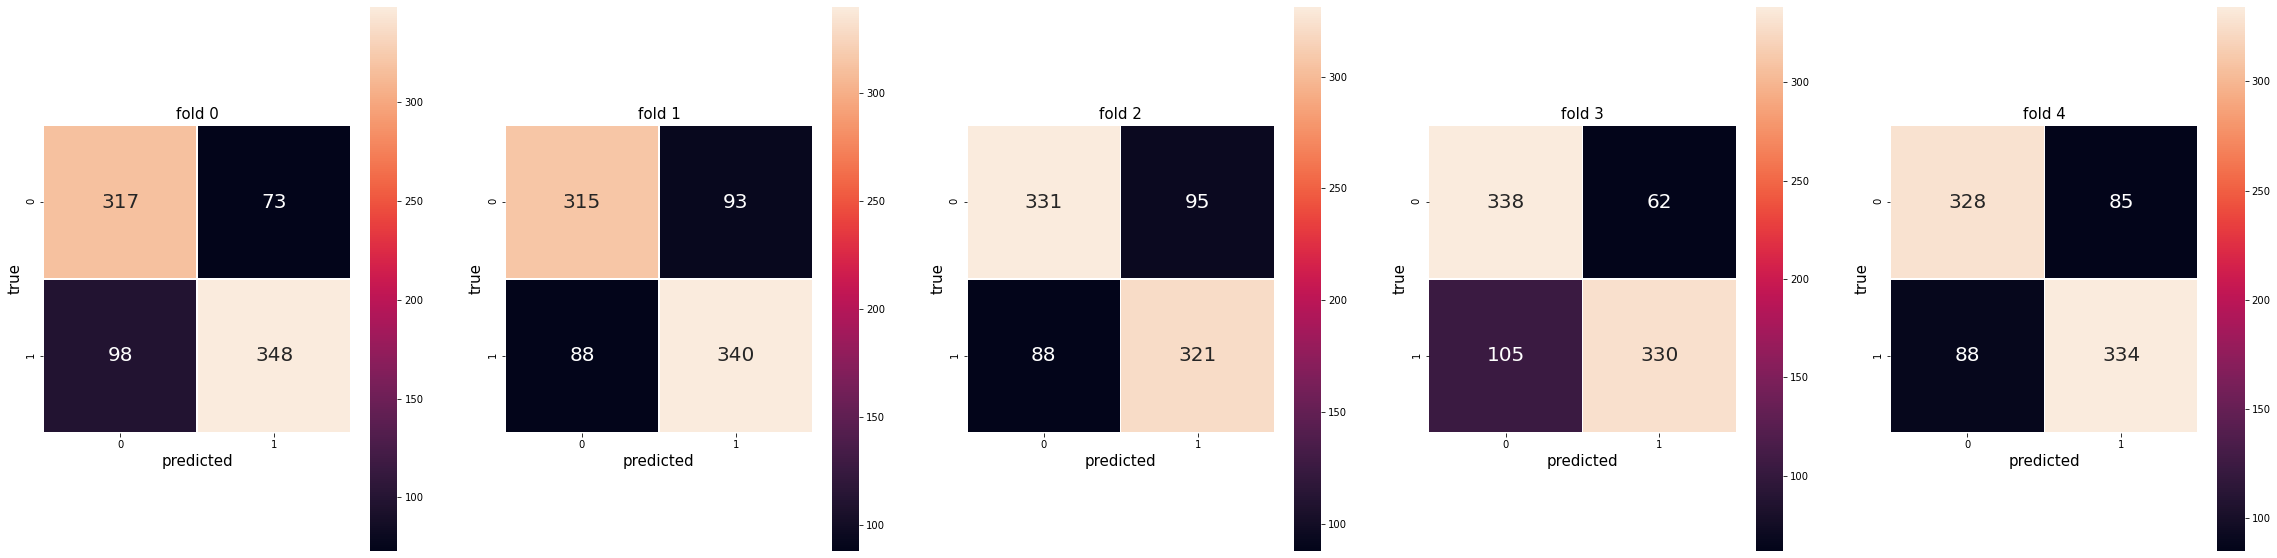

In [160]:
fig, ax = plt.subplots(1,5, figsize=(40,10))
for i, matrix in enumerate(confusion_matrixs.values()):
    sb.heatmap(matrix, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True, ax=ax[i])
    ax[i].set_xlabel('predicted', size=15)
    ax[i].set_ylabel('true', size=15)
    ax[i].set_title(f'fold {i}', size=15)

In [161]:
from xgboost import XGBClassifier

In [162]:
for i, (train_index, test_index) in enumerate(k_fold.split(abalone_data)):
    train_x, train_y = X.iloc[train_index], y.iloc[train_index]
    test_x, test_y = X.iloc[test_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    model = XGBClassifier(n_estimators=50, learning_rate=0.2, max_depth=4, random_state = 32)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    result.append(pred_y)
    recall_scores[f'fold {i}'] = recall_score(pred_y, test_y)
    precision_scores[f'fold {i}'] = precision_score(pred_y, test_y)
    accuracy_scores[f'fold {i}'] = accuracy_score(pred_y, test_y)
    f1_scores[f'fold {i}'] = f1_score(pred_y, test_y)
    confusion_matrixs[f'fold {i}'] = confusion_matrix(pred_y, test_y)

In [163]:
recall_scores

{'fold 0': 0.7912844036697247,
 'fold 1': 0.7894736842105263,
 'fold 2': 0.7703016241299304,
 'fold 3': 0.7765237020316027,
 'fold 4': 0.785876993166287}

In [164]:
precision_scores

{'fold 0': 0.837378640776699,
 'fold 1': 0.7951807228915663,
 'fold 2': 0.8157248157248157,
 'fold 3': 0.8056206088992974,
 'fold 4': 0.8214285714285714}

In [165]:
f1_scores

{'fold 0': 0.8136792452830188,
 'fold 1': 0.7923169267707083,
 'fold 2': 0.79236276849642,
 'fold 3': 0.7908045977011495,
 'fold 4': 0.8032596041909197}

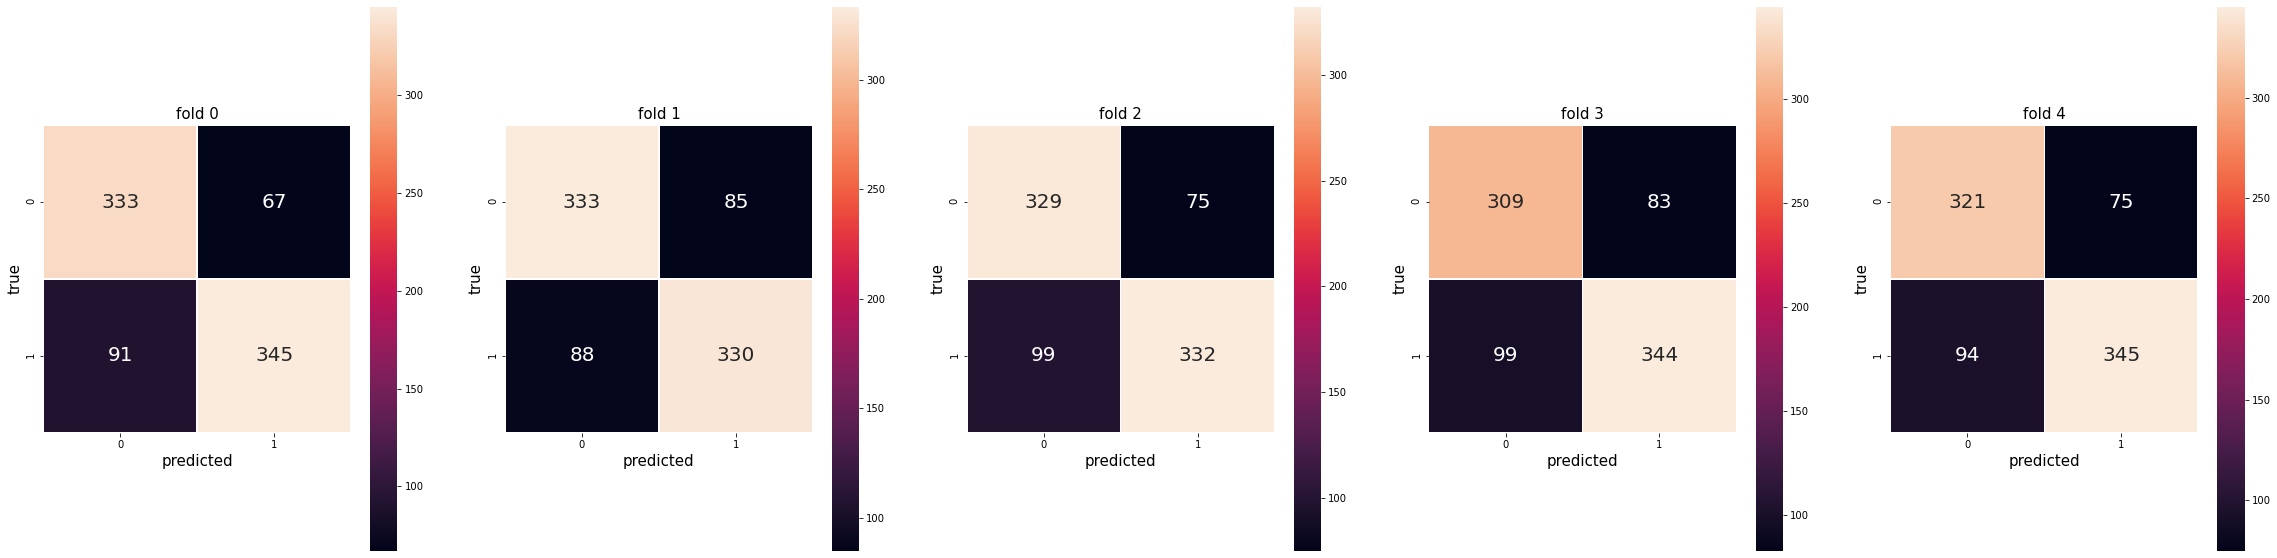

In [166]:
fig, ax = plt.subplots(1,5, figsize=(40,10))
for i, matrix in enumerate(confusion_matrixs.values()):
    sb.heatmap(matrix, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True, ax=ax[i])
    ax[i].set_xlabel('predicted', size=15)
    ax[i].set_ylabel('true', size=15)
    ax[i].set_title(f'fold {i}', size=15)